# Task- 1 

## Iris Flowers Classification ML Project 

### Anchal kapoor

### Problem Statement

**Predicting the type of Iris flower after training using machine learning algorithm.**

It includes three iris species with 50 samples each as well as some properties about each flower. 
One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id             
SepalLengthCm                     
SepalWidthCm                             
PetalLengthCm                               
PetalWidthCm                                  
Species

### Import the Libraries..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
import pandas as pd
iris= pd.read_csv('iris.csv')

In [3]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# check the rows and columns...

print('Rows:',iris.shape[0] )
print('Columns:',iris.shape[1] )

Rows: 150
Columns: 5


In [5]:
# check the first and last 5 rows...
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# check the 5 point summary of the data...
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# check the decsription of categorical columns...
iris.describe(include='object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4    Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Univariate Analysis

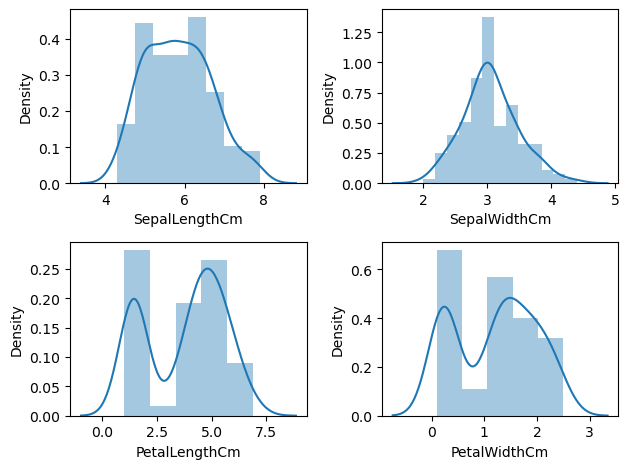

In [10]:
t=1
for i in iris.select_dtypes(np.number):
    plt.subplot(2,2,t)
    sns.distplot(iris[i])
    t+=1
plt.tight_layout()
plt.show()

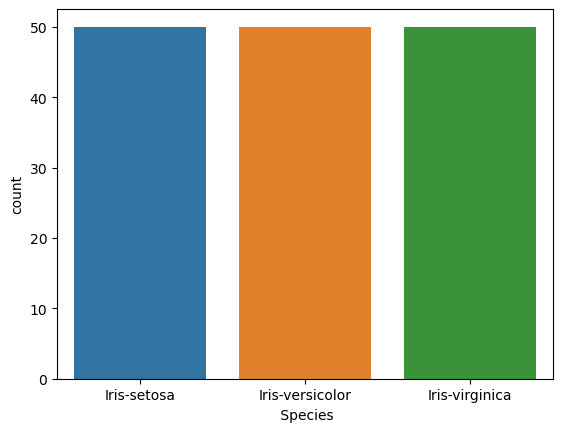

In [11]:
sns.countplot(x= iris[' Species'])
plt.show()

In [12]:
iris[' Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name:  Species, dtype: int64

In [13]:
# As we can see the dataset has equal number of counts for all three categories under species i.e setosa,versicolor,virginica.

### Bivariate Analysis..

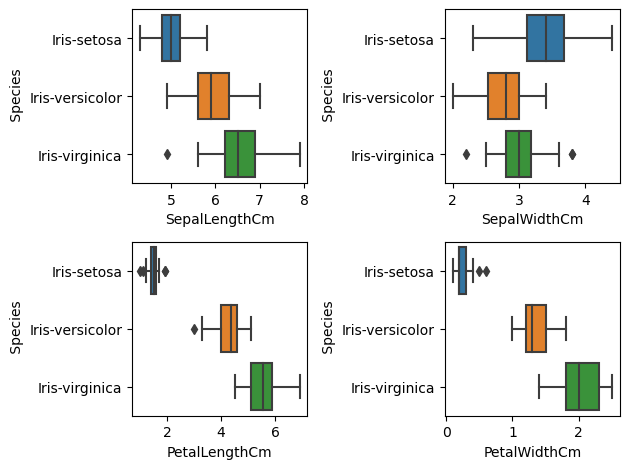

In [14]:
t=1
for i in iris.select_dtypes(np.number):
    plt.subplot(2,2,t)
    sns.boxplot(x=iris[i] , y=iris[' Species'])
    t+=1
    #plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

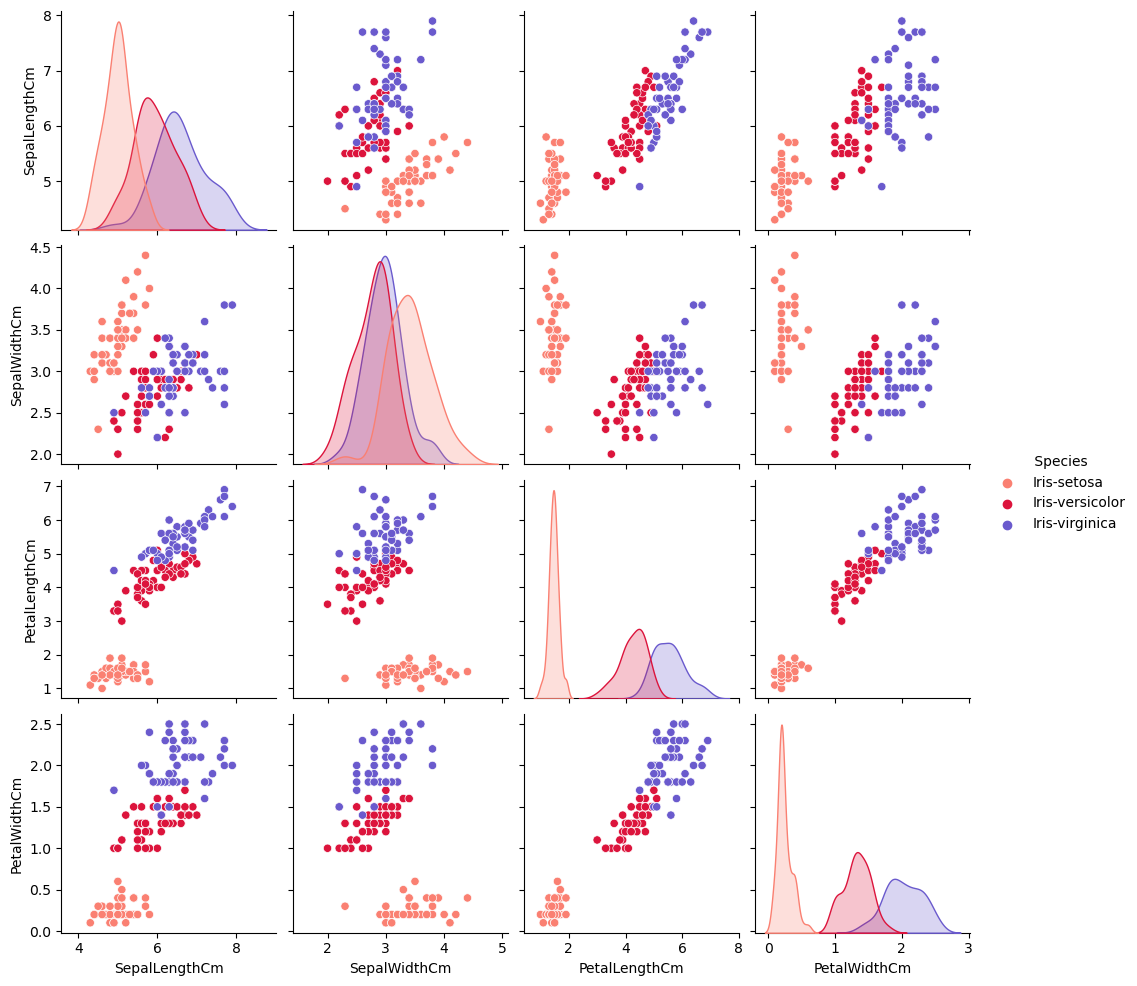

In [15]:
sns.pairplot(iris, hue=' Species', palette=['salmon', 'crimson','slateblue'])
plt.show()

### Data Preprocessing

In [16]:
# Check for null values and duplicate values...

In [17]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
 Species         0
dtype: int64

In [18]:
iris[iris.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [19]:
# as we can see there is no null value but 3 duplicate values in the dataset so we can remove the dupicate rows.

In [20]:
iris.drop_duplicates(inplace=True)

In [21]:
iris.duplicated().sum()

0

In [22]:
# Check the correlation...

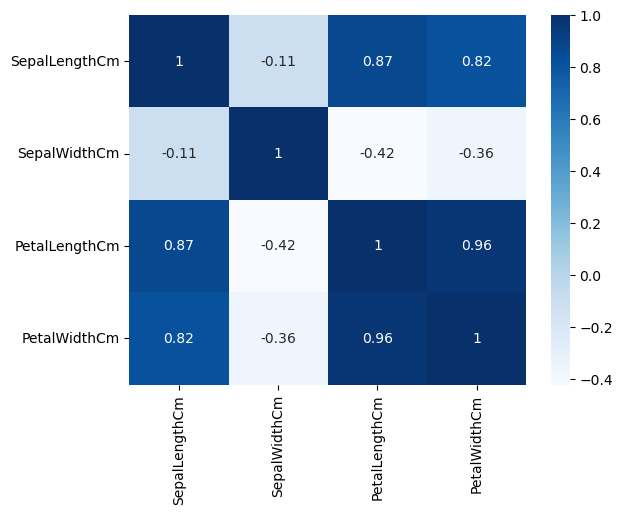

In [23]:
sns.heatmap(iris.corr(), annot=True, cmap='Blues')
plt.show()

**Observation**

* The Sepal Width and Sepal Length are negatively correlated The Petal Width and Petal Length are highly correlated*

* We will use all the features for training the algorithm and check the accuracy.*

* Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features 
that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.*

#### Encoding

In [24]:
# As the target variable is categorical we need to encode it to numerical..

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le= LabelEncoder()
iris[' Species']= le.fit_transform(iris[' Species'])

In [27]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Train-Test Split

In [30]:
X= iris.drop(columns=[' Species'], axis=1)
y=iris[' Species']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=18)

In [34]:
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(117, 4) (117,) (30, 4) (30,)


### Modelling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [41]:
# Initializing the model...
lr= LogisticRegression()
dct= DecisionTreeClassifier()
rfc= RandomForestClassifier()
knn= KNeighborsClassifier()
svm= SVC()
adb= AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb= XGBClassifier()

#### Logistic Regression

In [58]:
lr_model= lr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print('Accuracy of Logistic Regression:', accuracy_score(y_test,lr_pred))
print('Classification Report of Logistic Regression:\n', classification_report(y_test,lr_pred))

Accuracy of Logistic Regression: 0.9666666666666667
Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Decision Tree

In [59]:
dct_model= dct.fit(X_train, y_train)
dct_pred = dct_model.predict(X_test)
print('Accuracy of Decision Tree:', accuracy_score(y_test,dct_pred))
print('Classification Report of Decision Tree:\n', classification_report(y_test,dct_pred))

Accuracy of Decision Tree: 1.0
Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Random Forest

In [61]:
rfc_model= rfc.fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_test)
print('Accuracy of Random Forest:', accuracy_score(y_test,rfc_pred))
print('Classification Report of Random Forest:\n', classification_report(y_test,rfc_pred))

Accuracy of Random Forest: 1.0
Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### KNN 

In [62]:
knn_model= knn.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print('Accuracy of KNN:', accuracy_score(y_test,knn_pred))
print('Classification Report of KNN:\n', classification_report(y_test,knn_pred))

Accuracy of KNN: 0.9666666666666667
Classification Report of KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### SVM

In [64]:
svm_model= svm.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print('Accuracy of SVM', accuracy_score(y_test,svm_pred))
print('Classification Report of SVM:\n', classification_report(y_test,svm_pred))

Accuracy of SVM 0.9333333333333333
Classification Report of SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      1.00      0.89         8
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



#### Ada Boost

In [65]:
adb_model= adb.fit(X_train, y_train)
adb_pred = adb_model.predict(X_test)
print('Accuracy of Adabost', accuracy_score(y_test,adb_pred))
print('Classification Report of Adaboost:\n', classification_report(y_test,adb_pred))

Accuracy of Adabost 0.9333333333333333
Classification Report of Adaboost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      1.00      0.89         8
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



#### Gradient Boost

In [66]:
gbc_model= gbc.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
print('Accuracy of Gradient Boost', accuracy_score(y_test,gbc_pred))
print('Classification Report of Gradient Boost:\n', classification_report(y_test,gbc_pred))

Accuracy of Gradient Boost 1.0
Classification Report of Gradient Boost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### XG Boost

In [67]:
xgb_model= xgb.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print('Accuracy of XG Boost', accuracy_score(y_test,xgb_pred))
print('Classification Report of XG Boost:\n', classification_report(y_test,xgb_pred))

Accuracy of XG Boost 0.9666666666666667
Classification Report of XG Boost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [70]:
results= pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier',
                               'SVM','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier'],
                       'Score': ['0.97','1.00','1.00','0.97','0.94','0.94','1.00','0.97']})

In [71]:
results

,Model,Score
0,LogisticRegression,0.97
1,DecisionTreeClassifier,1.00
2,RandomForestClassifier,1.00
3,KNeighborsClassifier,0.97
4,SVM,0.94
5,AdaBoostClassifier,0.94
6,GradientBoostingClassifier,1.00
7,XGBClassifier,0.97


**As we can see that Decision Tree, Random Forest, Gradient Boost give 100% accuracy**


### Let's take the input form the user


In [73]:
sepal_length= float(input('Enter sepal length(cm):'))
sepal_width= float(input('Enter sepal width(cm):'))
petal_length= float(input('Enter petal length(cm):'))
petal_width= float(input('Enter petal width(cm):'))

# Convert the user input into a numpy array
input_data= np.array([[sepal_length,sepal_width,petal_length,petal_width]])

# Use the trained model to predict the species of the flower
predicted_species= dct_model.predict(input_data)

# Display the predicted species to the user
print('Predicted Species:', predicted_species[0])

Enter sepal length(cm):5.2
Enter sepal width(cm):2.7
Enter petal length(cm):6.3
Enter petal width(cm):1.2
Predicted Species: 2


**We clearly see that the predicted species is Verginica**

**As 0 indicates Setosa**            

**1 indicates Versicolor**                

**2 indicates Verginica**

### Conclusion

* So, we were have different categories of the flowers and we have to make a model to predict the species of the flower based on random values of each features.

* The features of the flowers are as follows:
* sepal length, sepal width, petal length, petal width

* Throughout our analysis, we observed that the different species of iris flower exhibits different characteristics and in terms of sepal and petal measurements.

* We use different machine learning algorithms as LogisticRegression, Decision Tree Classifier, Random Forest Classifier,        KNeighborsClassifier, SVM , AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier and as per the accuracy of the model we find that the Decision Tree, Random Forest, Gradient Boost give best accuracy to predict the species of flower in its respective species based on the measurements.